In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [81]:
import matplotlib.pyplot as plt
import seaborn as snb
import string

In [82]:
data = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

In [83]:
data.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [85]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [86]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [87]:
data.drop(['job_id' , 'salary_range' , 'telecommuting' , 'has_company_logo' , 'has_questions'] , axis = 1,inplace = True)

In [88]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [89]:
data.shape

(17880, 13)

In [90]:
data.fillna(' ',inplace=True)

In [91]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

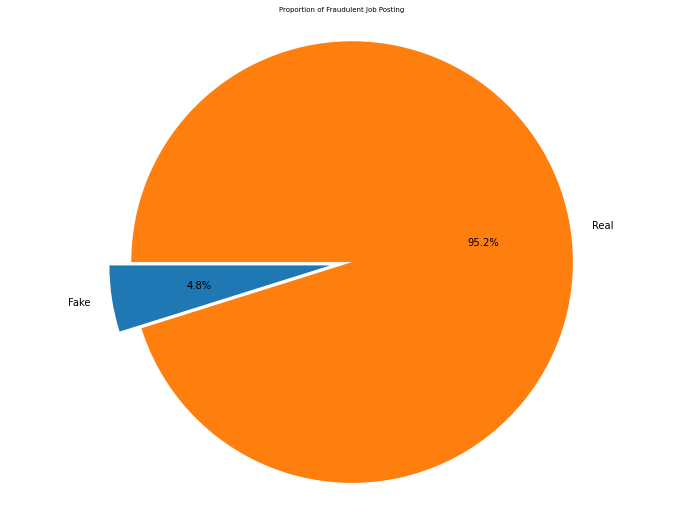

In [92]:
labels = 'Fake' ,'Real'

sizes = [data.fraudulent[data['fraudulent'] == 1].count() ,data.fraudulent[data['fraudulent'] == 0].count()]
explode =(0,0.1)

fig1 ,ax1 = plt.subplots(figsize =(12,9))
ax1.pie(sizes ,explode =explode, labels =labels, autopct ='%1.1f%%',startangle =180)

ax1.axis('equal')
plt.title("Proportion of Fraudulent Job Posting" ,size =7)
plt.show()

In [93]:
#Visualize Job postings by countries 

def split(location):
  l =location.split(',')
  return l[0]

data['country'] =data.location.apply(split)  

In [94]:
data['country'].nunique()

91

In [95]:
data['country'].value_counts()[:11]

US    10656
GB     2384
GR      940
CA      457
DE      383
        346
NZ      333
IN      276
AU      214
PH      132
NL      127
Name: country, dtype: int64

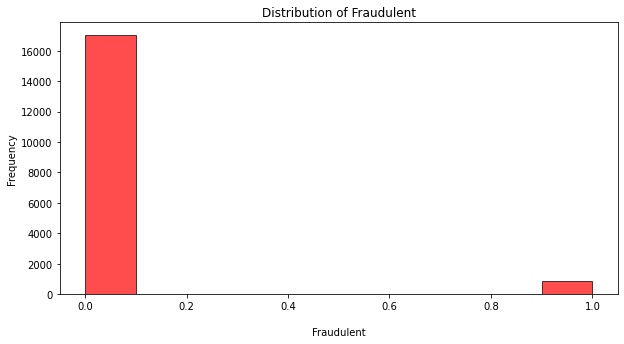

In [96]:
plt.figure(figsize=(10, 5))

plt.hist(data['fraudulent'], color='red', edgecolor='black', alpha=0.7)
plt.xlabel('\nFraudulent')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent')

plt.show()



Text(0, 0.5, 'Number of Jobs')

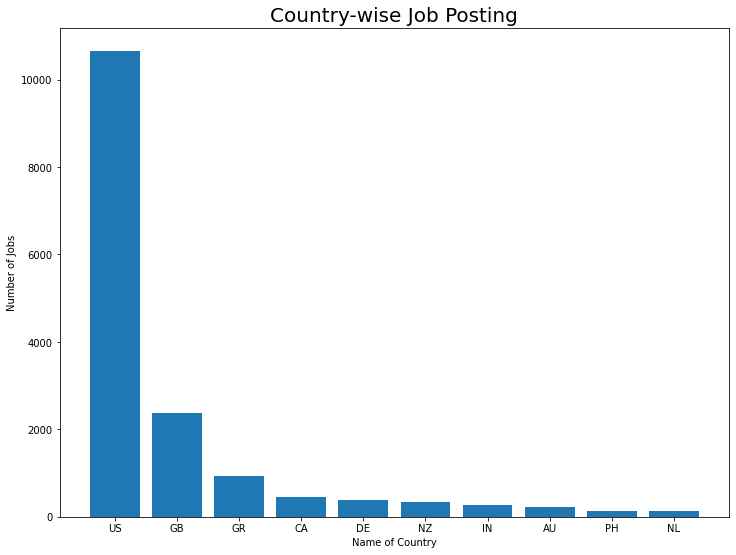

In [97]:
country =dict(data.country.value_counts()[:11])

del country[' ']
plt.figure(figsize=(12,9))

plt.title('Country-wise Job Posting',size=20)
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

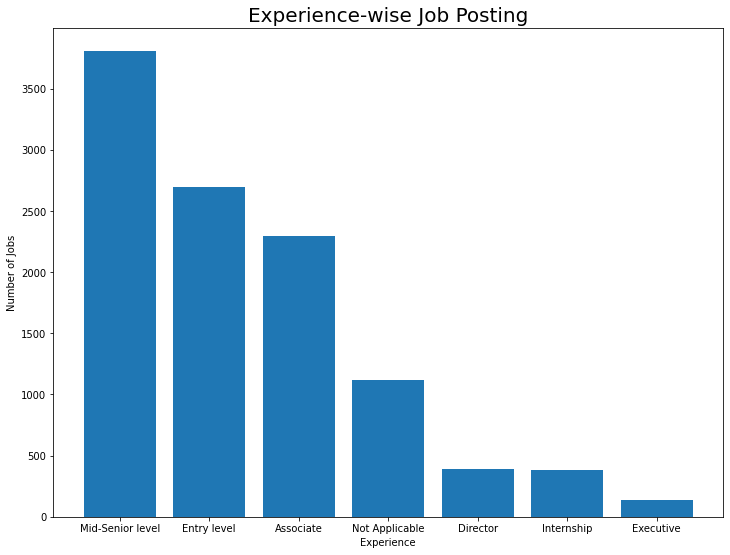

In [98]:
# Visualize Job posting by Experience 

experience =dict(data.required_experience.value_counts()[:11])

del experience[' ']
plt.figure(figsize=(12,9))

plt.title('Experience-wise Job Posting',size=20)
plt.bar(experience.keys(),experience.values())

plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

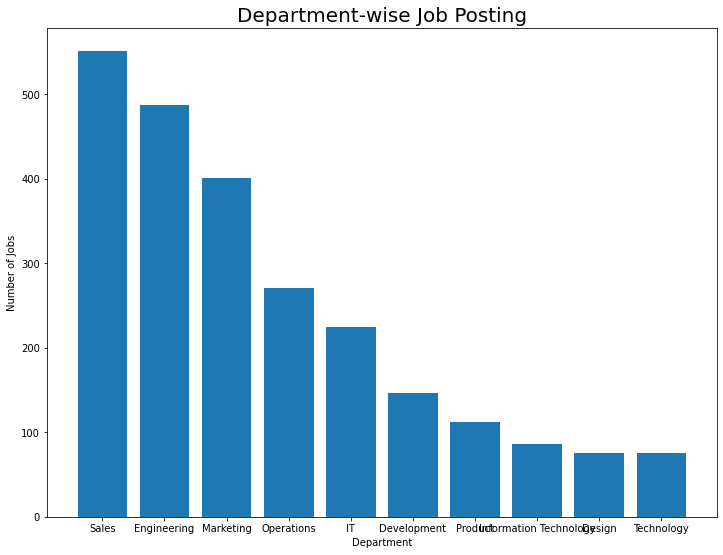

In [99]:
# Visualize Job posting by Department

department1 =dict(data.department.value_counts()[:11])

del department1[' ']
plt.figure(figsize=(12,9))

plt.title('Department-wise Job Posting',size=20) 
plt.bar(department1.keys(),department1.values())

plt.xlabel('Department')
plt.ylabel('Number of Jobs')

In [100]:
# TO find the fake job titles

data.title.value_counts()[:11]



English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [101]:
data[data.fraudulent == 1].title.value_counts()[:11]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Name: title, dtype: int64

In [102]:
data[data.fraudulent == 0].title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [103]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [104]:
data['text'] = data['title'] + ' '+ data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [105]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [106]:
# Check the frequency of Word in datsets

from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])

In [107]:
wordcloud = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(all_words)

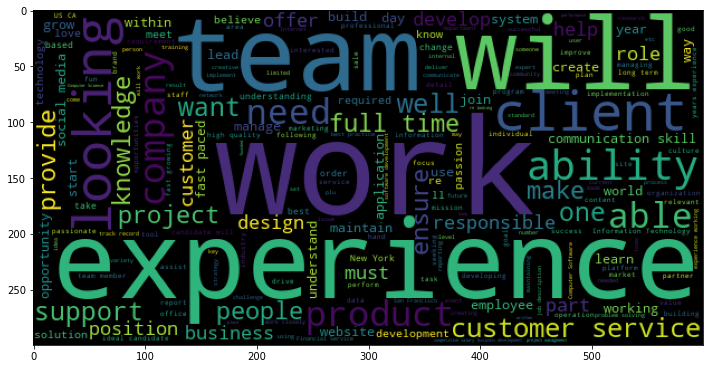

In [108]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud)
plt.show()

In [109]:
# frequency of word in real posting of jobs
real_post = ' '.join([text for text in data['text'][data['fraudulent']==0]])

In [110]:
wordcloud1 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(real_post)

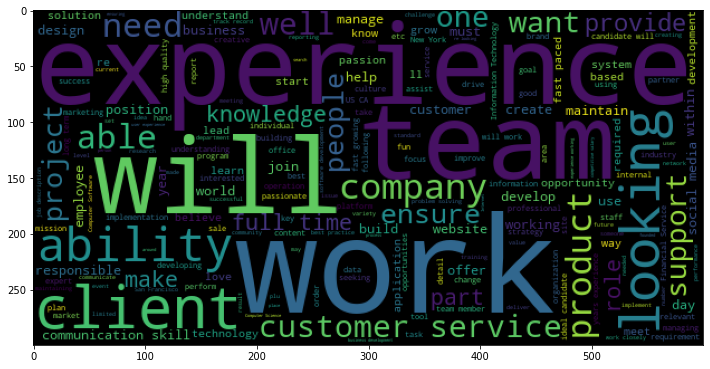

In [111]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud1)
plt.show()

In [112]:
# frequency of word in fake job postings
fake_post = ' '.join([text for text in data['text'][data['fraudulent'] == 1]])

In [113]:
wordcloud2 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(fake_post)

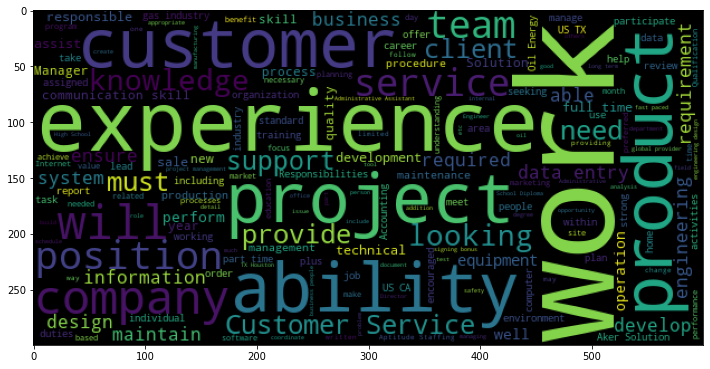

In [114]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud2)
plt.show()

In [115]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [116]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [117]:
stop_words = set(stopwords.words("english"))

In [118]:
data['text'] = data['text'].apply(lambda x:x.lower())

In [119]:
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [120]:
data['text'][0]

"marketing intern us, ny, new york marketing we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging exi

In [121]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(data.text, data.fraudulent ,test_size =0.3)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [124]:
# Convert the text data into vector format 
X_train_dtm = vect.transform(X_train)

In [125]:
X_train_dtm

<12516x86004 sparse matrix of type '<class 'numpy.int64'>'
	with 2319832 stored elements in Compressed Sparse Row format>

In [126]:


from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [127]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86004 sparse matrix of type '<class 'numpy.int64'>'
	with 979437 stored elements in Compressed Sparse Row format>

In [128]:
# Naive Bayes Classifier 

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [129]:
y_pred_nb = nb.predict(X_test_dtm)

In [130]:
accuracy_score(y_test,y_pred_nb)

0.9729679343773303

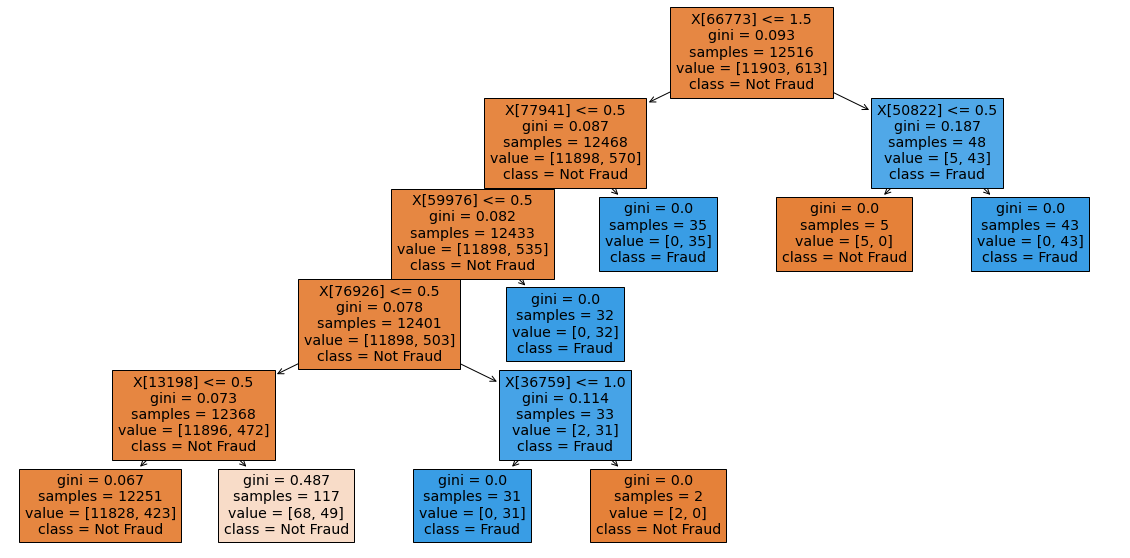

In [131]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier with limited depth and samples for splitting nodes
dt_short = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Fit the classifier to your data
dt_short.fit(X_train_dtm, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_short, filled=True, class_names=['Not Fraud', 'Fraud'])
plt.show()


In [132]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Fit the classifier to the training data
dt.fit(X_train_dtm, y_train)

# Now you can make predictions
y_pred_dt = dt.predict(X_test_dtm)


In [133]:
y_pred_dt = dt.predict(X_test_dtm)

In [134]:
accuracy_score(y_test,y_pred_dt)

0.9809843400447428

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [136]:
y=data.fraudulent
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [137]:
X=data.drop('fraudulent',1)
print(X.head())

                                                text
0  marketing intern us, ny, new york marketing we...
1  customer service - cloud video production nz, ...
2  commissioning machinery assistant (cma) us, ia...
3  account executive - washington dc us, dc, wash...
4  bill review manager us, fl, fort worth spotsou...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [138]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12516, 1) (12516,)
Test set: (5364, 1) (5364,)


In [139]:
input_text = ['general laborers us, ct, hartford elite environmental group llc. provides staffing services temporary employment opportunities wide range clients, business owners search employees, candidates search employment environmental, construction industry. elite environmental group currently hiring general laborers, construction, housekeeping, manufacturing associates temporary temporary hire positions, paying $9.00 - $13.00 per hour. you’re dependable looking work, contact elite environmental group today. job descriptionconstruction erect dismantle scaffolding, shoring, braces, traffic barricades, ramps, temporary structuresmanufacturing associate receive count stock items, record data manually using computer.general labor clean prepare construction sites eliminate possible hazards.pack unpack items stocked shelves stockrooms, warehouses, storage yards.housekeeper clean guest rooms common areasmark stock items using identification tags, stamps, electric marking tools, labeling equipment. ideal candidatesrelevant experience preferredreliable transportationcommitted safety timesexcellent attendance']

In [140]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category


In [141]:
input_text = ['Data Entry Admin/Clerical Positions - Work From Home ']

In [142]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category


In [143]:
df_job=pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer

df_job['department'] = df_job['department'].fillna(df_job['department'].mode()[0])

data_cat_imp=SimpleImputer(strategy="constant",fill_value="Missing")
cat_imp_feature=["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]

# Filling the Numerical values through existing value
data_num_imp=SimpleImputer(strategy="constant",fill_value=None)
num_imp_feature =["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

# Transforming into column
data_imp_trans=ColumnTransformer([("data_cat_imp",data_cat_imp,cat_imp_feature),
                                 ("data_num_imp",data_num_imp,num_imp_feature)])

# Transforming and assigning the data
transformed_data=data_imp_trans.fit_transform(df_job)
transformed_data

#Transforming the data into data frame
df_job_transformed_data=pd.DataFrame(transformed_data,
                         columns=["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])

X_trans = df_job_transformed_data.drop("fraudulent",axis=1)
y_trans = df_job_transformed_data.fraudulent
y_trans=y_trans.astype('int')

X_trans.shape, y_trans.shape,X_trans.columns

# Instantation of One Hot Encoder for categorical data tarnsformatio into Numeric 
one_hot=OneHotEncoder()
clf_trans=ColumnTransformer([("one_hot",one_hot,cat_imp_feature)],remainder="passthrough")
X_trans_fin=clf_trans.fit_transform(X_trans)
np.array(X_trans_fin)

X_train,X_test,y_train,y_test=train_test_split(X_trans_fin,y_trans,test_size=0.25, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random forest
model_rfm=RandomForestClassifier(random_state=42)
model_rfm.fit(X_train,y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, y_test)

# Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
dtc_accuracy = model_dtc.score(X_test, y_test)

# Logistic regression
model_logreg = LogisticRegression(solver='newton-cg', random_state=42)
model_logreg.fit(X_train, y_train)
y_prob = model_logreg.predict_proba(X_test)
Y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index = y_test.index)
lg_accuracy = model_logreg.score(X_test, y_test)

# Neural Network
clf = MLPClassifier(hidden_layer_sizes=(10,10,10,), max_iter=100,
                     activation='logistic', solver='lbfgs', learning_rate='constant', verbose=1,  random_state=42)  
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)
nn_accuracy = accuracy_score(y_pred_test,y_test)

print("Random Forest accuracy", rfc_accuracy)
print("Decision Tree accuracy", dtc_accuracy)
print("Logistic Regression accuracy", lg_accuracy)
print("Neural Network accuracy", nn_accuracy)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       514621     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49197D-01    |proj g|=  2.93490D-01

At iterate    1    f=  1.96522D-01    |proj g|=  2.17900D-02


 This problem is unconstrained.



At iterate    2    f=  1.93596D-01    |proj g|=  1.09860D-02

At iterate    3    f=  1.92450D-01    |proj g|=  1.02027D-03

At iterate    4    f=  1.92438D-01    |proj g|=  1.99842D-04

At iterate    5    f=  1.92438D-01    |proj g|=  1.45826D-04

At iterate    6    f=  1.92437D-01    |proj g|=  8.01003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****      6      7      1     0     0   8.010D-05   1.924D-01
  F =  0.19243728646348868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Random Forest accuracy 0.983668903803132
Decision Tree accuracy 0.9885906040268456
Logistic Regression accuracy 0

<BarContainer object of 4 artists>

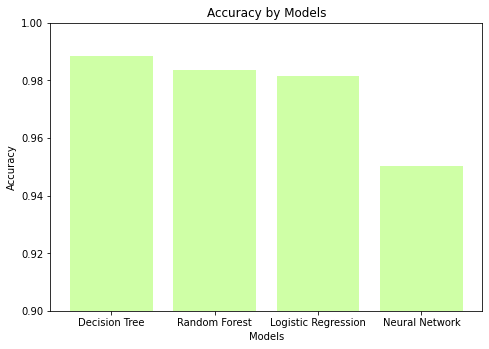

In [144]:
import matplotlib.pyplot as plt
fig = plt.figure()

c = ['#CFFFA6']

ax = fig.add_axes([0,0,1,1])
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Neural Network']
accuracy = [dtc_accuracy,rfc_accuracy, lg_accuracy,nn_accuracy]
ax.bar(models,accuracy)
ax.set_ylim([0.9, 1])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models')
plt.bar(models, height = accuracy, color = c)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


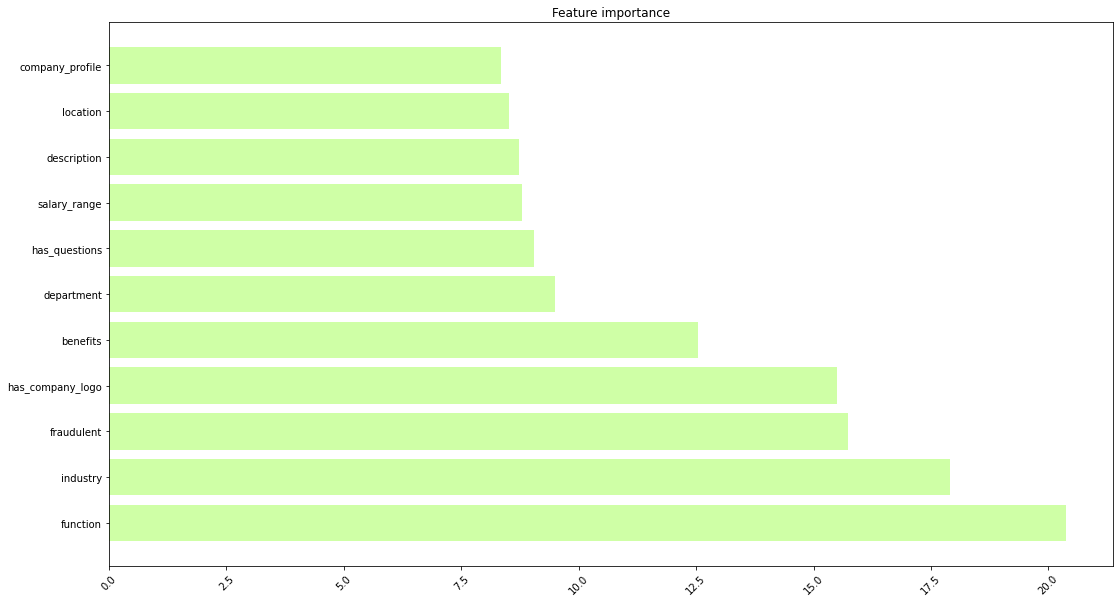

In [145]:
feature_dict=dict(zip((df_job.columns),list(model_rfm.feature_importances_)))

log_val = []
for i in feature_dict.values():
    log_val.append(np.log(i))

log_val = np.nan_to_num(log_val, neginf=0)
log_val = [i * (-1) for i in log_val]
names = list(feature_dict.keys())
dictionary = dict(zip(names, log_val))

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse = True))
names = []
values = []

for k, v in sorted_dict.items():
    if v != -0.0:
        names.append(k)
        values.append(v)
        
plt.figure(figsize = (18, 10))
colors = ['#CFFFA6']
plt.barh(range(len(values)), values, tick_label=names, color = colors[0])
plt.xticks(rotation=45)
plt.title('Feature importance')
plt.show()